# 1. Descripción del problema

La mayoría de los problemas de ordenamiento pueden ser resueltos con distintos métodos, dependiendo de la forma en el que está establecido el problema es mas conveniente utilizar un determinado algoritmo que otro. Por ejemplo si ordenamos una determinada secuencia de números decimales existen ciertos algoritmos que podran realizar esta tarea en un tiempo más eficiente.


# 2. Descripción del algoritmo

**Entrada:** Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida:** Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$ de tal manera que $[a_1'\leq a_2'\leq...\leq a_n']$


El algoritmo **BucketSort** recibe de entrada una secuencia de números y los retorna de menor a mayor, en el que se divide el rango de los elementos en **n** sub intervalos, o también llamados **buckets**.

Al tener los **buckets** ya establecidos se recorre el arreglo de entrada y se van agregando los elementos en sus buckets correspondientes. Con la característica de que cada bucket contiene elementos que son menores a otro bucket. Una vez se haya recorrido todo el arreglo se ordena cada bucket utilizando un método de ordenamiento, en este caso **InsertionSort**. Obteniendo el arreglo de entrada ordenado de menor a mayor.


**Ejemplo:**
Dado un arreglo $A = [0.67 , 0.26 , 0.42 , 0.23 , 0.64]$

Como los números van del 0 al 9 crearemos 10 **buckets**.

Recorremos el arreglo obteniendo el primer número de cada decena. Por ejemplo el número 0.67 tomamos el número 6. Del número 0.26 tomamos el 2 y así con los demás. 

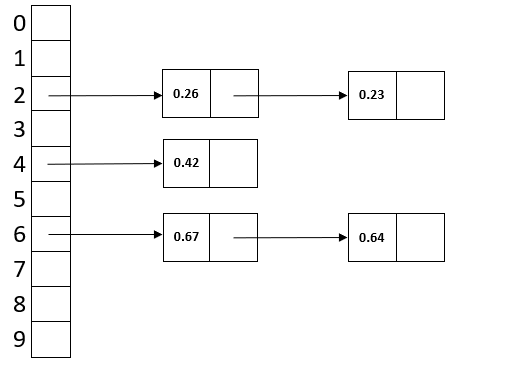


Una vez tengamos todos los elementos en sus respectivos **buckets** se ordenan utilizando el algoritmo **Insertion Sort**, para luego insertar los elementos de cada bucket en nuestro arreglo original.


## 3. Código

In [10]:
import random
from termcolor import colored
import copy


#Insertion Sort para ordenar los elementos de los buckets

def insertion_sort(a):
  n = len(a)
  respaldo = 0

  for i in range (1,len(a)):
    respaldo = i    
    key = a[i]
    for k in range (i - 1,-1,-1):
      if a[k] < key:
        a[k + 1] = key
        break

      a[k + 1] = a[k]
      a[k] = key

    i = respaldo

    if key < a[0]:
      a[0] = key
  return a

def bucketSort(A,verbose):
  bucket = []

  #Crear buckets
  for i in range(10):
    bucket.append([])
  if verbose == True:
    print("Creacion de buckets...")
    print(bucket)
    print("\n================================================================")

  #Insertar elementos en los buckets
  if verbose == True:
      print("Insertar elementos en los buckets correspondientes...")
  cont = 0
  for j in A:
    idx = int(10 * j)
    bucket[idx].append(j)
    if verbose == True:
      print("Elemento a agregar: ",j)
      cont +=1
      print(cont,'-',bucket)
      print("\n================================================================")

  #Ordenar elementos de cada bucket


   #Ordenar elementos de cada bucket
  if verbose == True:
      print("Ordenar elementos de cada bucket con InsertionSort")
  for i in range(len(bucket)):
      if verbose == True:
          print(colored(bucket[i],"red")," Ordenando...")
      
      bucket[i] = insertion_sort(bucket[i])
      
      if verbose == True:
          print(colored(bucket[i],"blue")," Ordenado!")
          print("------------------")
          

  if verbose == True:
    print("Insertar elementos de los buckets ordenados en nuestro arreglo original")
    if verbose == True:
      print("Arreglo de entrada: ",A)
  k = 0
  #Insertar elementos de los buckets ordenados en nuestro arreglo original
  for i in range(len(bucket)):
      for j in range(len(bucket[i])):
          if verbose == True:
            print("\nnúmero",bucket[i][j])
          A[k] = bucket[i][j]
          if verbose == True:
            print(colored(str(A[:k+1])[1:-1],"green"),str(A[k+1:])[1:-1])

          k += 1

  return A

A = [0.67 , 0.26 , 0.42 , 0.23 , 0.64]
print("Arreglo de entrada: ",A)
verbose = False
bucketSort(A,verbose)
print("Arreglo de salida: ",A)




Arreglo de entrada:  [0.67, 0.26, 0.42, 0.23, 0.64]
Arreglo de salida:  [0.23, 0.26, 0.42, 0.64, 0.67]


## 2.1 verbose == `True`



In [ ]:
A = [0.67 , 0.29 , 0.42 , 0.22 , 0.64, 0.25]
bucketSort(A,verbose = True)
print("\nArreglo de salida: ",A)

Creacion de buckets...
[[], [], [], [], [], [], [], [], [], []]

Insertar elementos en los buckets correspondientes...
Elemento a agregar:  0.67
1 - [[], [], [], [], [], [], [0.67], [], [], []]

Elemento a agregar:  0.29
2 - [[], [], [0.29], [], [], [], [0.67], [], [], []]

Elemento a agregar:  0.42
3 - [[], [], [0.29], [], [0.42], [], [0.67], [], [], []]

Elemento a agregar:  0.22
4 - [[], [], [0.29, 0.22], [], [0.42], [], [0.67], [], [], []]

Elemento a agregar:  0.64
5 - [[], [], [0.29, 0.22], [], [0.42], [], [0.67, 0.64], [], [], []]

Elemento a agregar:  0.25
6 - [[], [], [0.29, 0.22, 0.25], [], [0.42], [], [0.67, 0.64], [], [], []]

Ordenar elementos de cada bucket con InsertionSort
[]  Ordenando...
[]  Ordenado!
------------------
[]  Ordenando...
[]  Ordenado!
------------------
[0.29, 0.22, 0.25]  Ordenando...
[0.22, 0.25, 0.29]  Ordenado!
------------------
[]  Ordenando...
[]  Ordenado!
------------------
[0.42]  Ordenando...
[0.42]  Ordenado!
------------------
[]  Ordenand

# 3. Tiempo de ejecución

La complejidad temporal del algoritmo es distinta dependiendo de como están distribuidos los elementos en el arreglo. Observemos los distintos casos.

# 3.1 Mejor caso teórico
En el caso de que agregemos solo un valor a cada bucket este ya se encontrará de manera ordenada. Por lo que nos da una complejidad de $O(n)$.


# 3.2 Peor caso teórico
Como bien sabemos, el algoritmo **bucketsort** actúa utilizando los llamados **buckets** para almacenar los elementos que estén en un mismo rango, o bien como en la implementación anterior, que posean la misma decena de número. Sin embargo, ¿Qué sucede cuando todos los elementos de un arreglo de entrada están dentro de un mismo rango de bucket? En ese caso todos los números quedarán ingresados dentro de un mismo bucket. Por lo que el tiempo de ejecución del algoritmo terminará dependiendo en gran medida del algoritmo de ordenamiento que utilizemos para ordenar los elementos de los buckets. En el caso de **InsertionSort** nos quedaría una complejidad temporal de $O(n^2)$.

# 3.3 Caso promedio
El algoritmo realiza varios ciclos **for** que recorren el arreglo en su totalidad. Obteniendo una comlejidad $O(n)$. sin embargo, en uno de los varios ciclos **for** se hacen $n$ llamadas a **InsertionSort**. Obteniendo la siguiente ecuación.

$T(n) =$ $\sum\limits_{i=0}^{n-1}O(nᵢ^2)$

La sumatoria describe lo que tardarán las llamadas a **InsertionSort**. $nᵢ$ corresponde al número de elementos que tendrá que ordenar **InsertionSort**.
Las llamadas de hacen para todo el arreglo, por lo que la sumatoria es desde 0->n-1.

Para encontrar el valor esperado se puede establecer una expresión para definir cual será el término al cual se debe calcular un valor esperado.

$E[T(n)] = $ $E[Θ(n) + \sum\limits_{i=0}^{n-1}O(nᵢ^2)]$

$=$ $Θ(n) + \sum\limits_{i=0}^{n-1}E[O(nᵢ^2)]$

$=$ $Θ(n) + \sum\limits_{i=0}^{n-1}O[E(nᵢ^2)]$

En el que $E[nᵢ^2]$ corresponde al valor a calcular.

Para expresar el cálculo del valor esperado tomaremos en cuenta de que cada elemento del arreglo tiene la misma probabilidad de caer en un $bucket[i]$, por lo que se define un indicador de variable que represente este evento.

$Xᵢⱼ =$ $I${$A[j]$ queda en bucket i}

Considerando que $i$ varía entre 0 -> n-1 y $j$ que representa un índice superior a i) varía entre 1 -> n. El valor de $nᵢ$ sería:

$n = \sum\limits_{j=1}^{n}Xᵢⱼ$

Si reemplazamos $nᵢ$ en el valor esperado y desarrollando la expresión, quedaría:

$E[nᵢⱼ^2] =$ $E[(\sum\limits_{j=1}^{n}Xᵢⱼ)^2]$

$ = E[\sum\limits_{j=1}^{n}Xᵢⱼ \sum\limits_{k=1}^{n}Xᵢₖ]$   

$Xᵢₖ$ corresponde al evento en el que $A[k]$ cae en un bucket $i$.

$ = E[\sum\limits_{j=1}^{n}X^2ᵢⱼ + \sum\limits_{1 \leq j \leq n} \sum\limits_{1 \leq k \leq n}Xᵢⱼ Xᵢₖ]$ 

(En el que $k \neq j$)

$ = \sum\limits_{j=1}^{n}E[X^2ᵢⱼ] + \sum\limits_{1 \leq j \leq n} \sum\limits_{1 \leq k \leq n}E[Xᵢⱼ Xᵢₖ]$


Ahora se evalúan los valores de las sumatorias en función de obtener valores concretos para trabajar. $Xᵢⱼ$ es un evento que tiene una probabilidad de $1/n$ de ocurrir y $1-1/n$ de no ocurrir. Esto resulta en:

$E[X^2ᵢⱼ]$ $= 1^2 * \frac{1}{n} + 0^2 * (1 - \frac{1}{n})$

$ = \frac{1}{n}$


Xᵢₖ al ser una operación independiente, pero que se basa en la lógica de las otras, tiene la misma expresión de probabilidad.

$E[XᵢⱼXᵢₖ] = $ E[Xᵢⱼ] E[Xᵢₖ]

$ = \frac{1}{n}*\frac{1}{n}$

$ = \frac{1}{n^2}$

Teniendo los valores anteriores, se pueden desarrollar las sumatorias de la expresion $E[nᵢ^2]$

$E[nᵢ^2] = \sum\limits_{j=1}^{n}\frac{1}{n} + \sum\limits_{1 \leq j \leq n} \sum\limits_{1 \leq k \leq n}\frac{1}{n^2}$

$ = n*\frac{1}{n}+n(n-1)*\frac{1}{n^2}$

$ = 1 + \frac{n-1}{n}$

$ = 2 - \frac{1}{n}$

Como ya tenemos nuestro valor de $E[nᵢ^2]$, se puede obtener el siguiente tiempo de ejecución: 

$T(n) = Θ(n) + \sum\limits_{i=0}^{n-1}O(nᵢ^2)$

$T(n) = Θ(n) + \sum\limits_{i=0}^{n-1}O(2-\frac{1}{n})$

$T(n) = Θ(n) + n * O(2-\frac{1}{n})$

$T(n) = Θ(n) + O(2n-1) = Θ(n)$


Por lo tanto, el tiempo de ejecución en un caso promedio es $Θ(n)$


# 4. Correctitud

**Inducción matemática**

Para probar la correctitud, utilizaremos el metodo de inducción matemática, básicamente consisten en que si queremos probar alguna declaración $P(n)$ debemos probar un par de condiciones.

1. Probar un caso base para $P(n)$ como $P(1)$
2. Probar que si $P(m)$ es verdad para m < n, entonces P(n) también lo es.

Consideremos que para un $Bucket[i]$ que esté en el arreglo **B** de $n$ Buckets, este contendrá elementos en un rango [1/n * i ... 1/n * (i+1)]. Además, cada $Bucket[i]$ contiene datos que son menores a los de otro Bucket [i+1], por tanto, los elementos del Bucket $B[1] < B[2] <... B[n-1] < B[n]$.

Para P(1), cuando hay un solo elemento en el $Bucket[i]$, significa que no se deben ordenar elementos, por lo cual, este Bucket está ordenado.

Para P(m) elementos en un $Bucket[i]$, sabemos que InsertionSort ordena elementos con éxito un arreglo **C** y esto se probó con su propiedad invariante de bucle, en otra ocasión, por tanto, el $Bucket[i]$, contendrá los mismos elementos ordenados de menor a mayor una vez se aplique InsertionSort.

Como anteriormente se mencionó, cada Bucket contiene elementos menores a los que contienen los Buckets posteriores, y cada Bucket contiene datos ordenados luego de aplicar InsertionSort, en consecuencia, se puede intuir que ya tenemos un arreglo **B** con los elementos de **A** ordenados de menor a mayor. Solo es necesario reemplazar los elementos de **B** en **A** desde 0 hasta **n**.



# 5. Experimentos

A continuación se realizarán dos experimentos. Primero se comparara el algoritmo **Radix Sort** con **BucketSort** para ordenar números enteros.
Luego, se compararan los tiempos de ejecución de **InsertionSort**, **BubbleSort** y **BucketSort**.


## 5.1 RadixSort vs BucketSort

Para el experimento utilizaremos un tamaño de arreglo de $[5,249]$. El arreglo de entrada contendrá números entre 1 y 250



In [18]:
def countingSort(arr, exp1):
 
    n = len(arr)
 
    output = [0] * (n)
 
    count = [0] * (10)
 
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]
 
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
 

    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]
 
def radixSort(arr):
 
    max1 = max(arr)
 

    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10
 
 

In [11]:
def bucketSortInt(array):
    largest = max(array)
    length = len(array)
    size = largest/length
 
    buckets = [[] for i in range(length)]
 
    for i in range(length):
        index = int(array[i]/size)
        if index != length:
            buckets[index].append(array[i])
        else:
            buckets[length - 1].append(array[i])
 
    for i in range(len(array)):
        buckets[i] = insertion_sort(buckets[i])
 
 
    result = []
    for i in range(length):
        result = result + buckets[i]
             
 


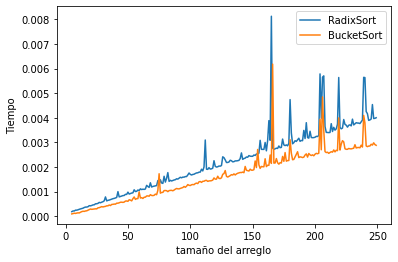

In [73]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]
ix=[]; by=[]


for n in range(5,250):
  comp = 0
  verbose = False
  p = 0
  a = random.sample(range(1, 250), n)
  r = len(a)-1
  q = int((p+r)/2)

  z = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  ix.append(n)
  by.append(z)


  t = repeat(setup="from __main__ import bucketSortInt", stmt=f"bucketSortInt({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(ix,by)

plt.plot(x,y)


plt.legend(["RadixSort","BucketSort"])

plt.xlabel('tamaño del arreglo')
plt.ylabel('Tiempo')
plt.show()

Como podemos apreciar, el algoritmo **BucketSort** es mas eficiente en tiempo de ejecución que **RadixSort**. Esto se debe a que **RadixSort** opera en un tiempo $O(n*w)$ siendo $w$ la cantidad de claves que utiliza, mientras que bucketSort opera en un tiempo $O(n)$ en los casos promedios como se demostró anteriormente.

## 5.2 BucketSort con distintos algoritmos de ordenamiento

Para este experimento utilizaremos un tamaño de arreglo de $[5,249]$, El arreglo de entrada contendrá números entre 1 y 250

In [32]:

def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0 #contador de comparaciones

    if verbose == True: print("input array:",a)

    for i in range(1,n+1):
        if verbose == True: print("\nPasada",i)
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                a[j], a[j + 1] = a[j + 1], a[j]
                if verbose == True: 
                  print(str(a[:j])[1:-1],",",colored(f"{str(a[j:j+2])[1:-1]}","red"),",",str(a[j+2:])[1:-1])

                already_sorted = False

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(a[:n-i])[1:-1],",",colored(f"{str(a[n-i:])[1:-1]}","blue"))

        if already_sorted:
            if verbose == True: print("is sorted!")
            break

    if verbose == True: print("\noutput array:",a)

    return a, T


In [36]:
def insertion_sort(a):
  n = len(a)
  respaldo = 0

  for i in range (1,len(a)):
    respaldo = i    
    key = a[i]
    for k in range (i - 1,-1,-1):
      if a[k] < key:
        a[k + 1] = key
        break

      a[k + 1] = a[k]
      a[k] = key

    i = respaldo

    if key < a[0]:
      a[0] = key
  return a

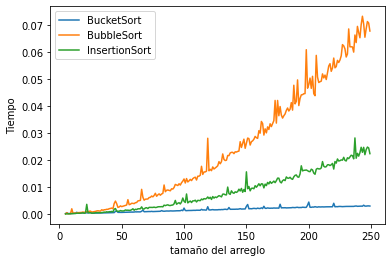

In [39]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
ix=[]; by=[]
Ix=[]; By=[]
Ax=[]; Cy=[]
rx=[]; wy=[]
fx=[]; gy=[]

for n in range(5,250):
  a = random.sample(range(1, 250), n)
  verbose = False
  z = repeat(setup="from __main__ import bucketSortInt", stmt=f"bucketSortInt({a})", repeat=1, number=10)

  ix.append(n)
  by.append(z)

  q = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a},{verbose})", repeat=1, number=10)
  rx.append(n)
  wy.append(q)

  l = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a})", repeat=1, number=10)
  fx.append(n)
  gy.append(l)

plt.plot(ix,by)

plt.plot(rx,wy)

plt.plot(fx,gy)

plt.legend(["BucketSort","BubbleSort","InsertionSort"])

plt.xlabel('tamaño del arreglo')
plt.ylabel('Tiempo')
plt.show()

Como podemos apreciar, es interesante el hecho de un algoritmo de ordenamiento como **InsertionSort** que posee un tiempo de ejecución de $O(n^2)$ en el caso promedio, pueda ser extremadamente útil en la implementación de **BucketSort** y que termine con un tiempo de ejecución mucho menor, más específicamente de tipo lineal $O(n)$ en el caso promedio.